Extract mel-spectrogram from audio

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.metrics import Precision, Recall
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut




import os
import glob


Find graphic specs

train

In [2]:
def create_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])
    return model

In [3]:
# Convert images to numpy arrays
def convert_images_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert image to numpy array
        image = load_img(file, target_size=(640, 480))
        image_arr = img_to_array(image)
        images_as_array.append(image_arr)
    return np.array(images_as_array)

In [4]:
pd_files = glob.glob("./plots/PD/*.png")
hc_files = glob.glob("./plots/HC/*.png")

pd_images = convert_images_to_array(pd_files)
hc_images = convert_images_to_array(hc_files)

pd_labels = np.ones(len(pd_files))
hc_labels = np.zeros(len(hc_files))

data = np.concatenate((pd_images, hc_images), axis=0)
labels = np.concatenate((pd_labels, hc_labels), axis=0)

loo = LeaveOneOut()

loss_values = []
accuracy_values = []
precision_values = []
recall_values = []

for train_index, test_index in loo.split(data, labels):
    model = create_model()
    model.fit(data[train_index], labels[train_index], epochs=20)
    scores = model.evaluate(data[test_index], labels[test_index], verbose=0)
    
    loss_values.append(scores[0])
    accuracy_values.append(scores[1])
    precision_values.append(scores[2])
    recall_values.append(scores[3])

    print("Loss: %.2f" % scores[0])
    print("Accuracy: %.2f%%" % (scores[1] * 100))
    print("Precision: %.2f%%" % (scores[2] * 100))
    print("Recall: %.2f%%" % (scores[3] * 100))

Epoch 1/20
2/2 [==============================] - 0s 19ms/step - loss: 31351.2852 - accuracy: 0.3400 - precision: 0.3125 - recall: 0.1852
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 29156.4316 - accuracy: 0.3800 - precision: 0.3889 - recall: 0.2593  
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 70007.0625 - accuracy: 0.5400 - precision: 0.5400 - recall: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 14ms/step - loss: 49520.0156 - accuracy: 0.5400 - precision: 0.5400 - recall: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 14ms/step - loss: 14115.6729 - accuracy: 0.5400 - precision: 0.5625 - recall: 0.6667
Epoch 6/20
2/2 [==============================] - 0s 14ms/step - loss: 48634.1758 - accuracy: 0.4600 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 14ms/step - loss: 39566.3398 - accuracy: 0.4600 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/20
2/2 [

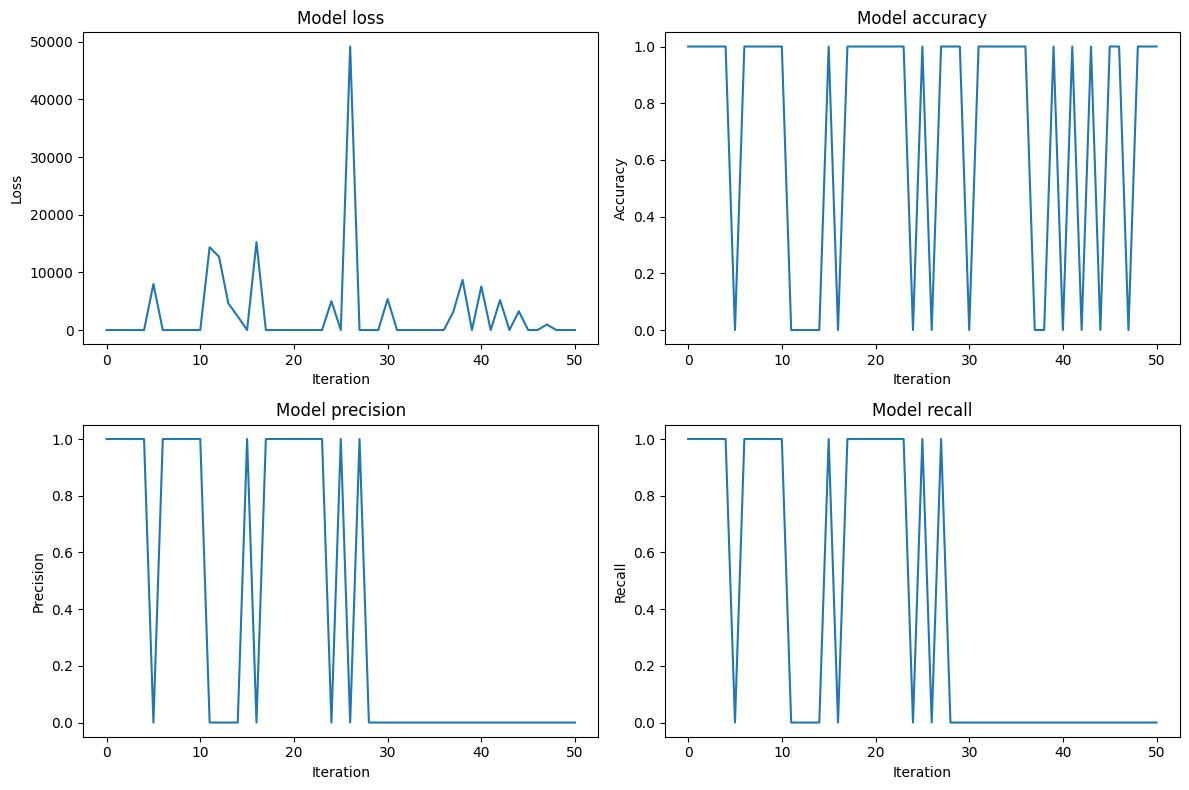

In [5]:
# Plotting the metrics
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(loss_values)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')

plt.subplot(2,2,2)
plt.plot(accuracy_values)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')

plt.subplot(2,2,3)
plt.plot(precision_values)
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Iteration')

plt.subplot(2,2,4)
plt.plot(recall_values)
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Iteration')

plt.tight_layout()
plt.show()